In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('/home/tabb99/gdrive/Recreation/bike/fit-data/2022-06-12_17-40-52.csv')
df.sample(5)

,timestamp,motor_power,power,cadence,speed,distance,altitude,currAssist,curCurrentScale,curProfileScale,batCurrCap1,motorTemp
3710,2022-06-13 02:43:24,120,146,86,7.200,21813.0,194.8,2,100,35,252,38
3830,2022-06-13 02:45:24,71,130,82,4.309,22385.0,212.6,2,100,35,245,41
2178,2022-06-13 02:17:52,0,0,0,12.844,13342.0,171.0,0,0,0,283,30
3758,2022-06-13 02:44:12,299,257,79,3.809,22108.0,194.2,3,100,55,249,40
2718,2022-06-13 02:26:52,66,147,83,6.144,16554.0,122.4,1,100,15,280,29


<AxesSubplot:>

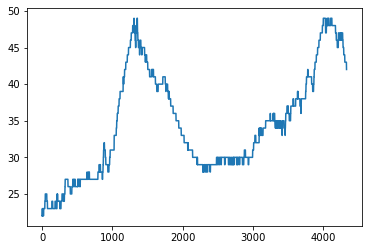

In [16]:
df.motorTemp.plot()

<AxesSubplot:>

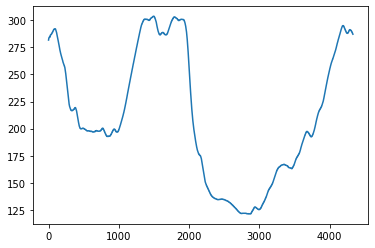

In [17]:
df.altitude.plot()

<AxesSubplot:>

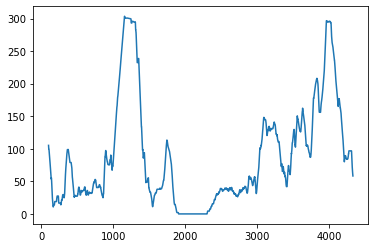

In [18]:
df.motor_power.rolling(100).mean().plot()

<AxesSubplot:>

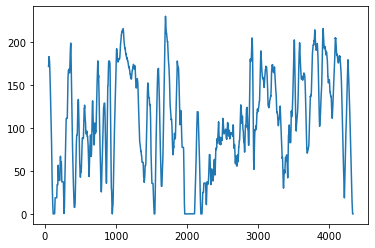

In [19]:
df.power.rolling(50).mean().plot()

<AxesSubplot:>

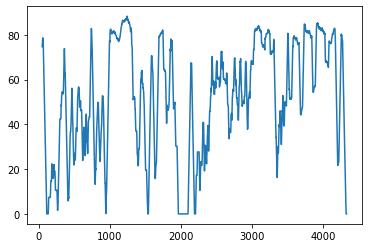

In [20]:
df.cadence.rolling(50).mean().plot()

<AxesSubplot:>

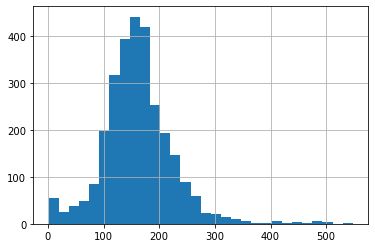

In [21]:
df[df.power > 0].power.hist(bins=30)

<AxesSubplot:>

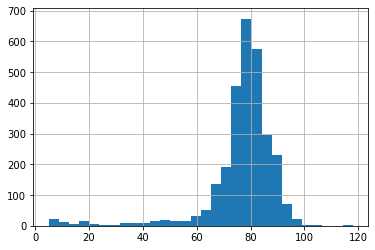

In [22]:
df[df.cadence > 0].cadence.hist(bins=30)

In [23]:
df.motor_power.sum() / df.power.sum()

0.8203564414493072

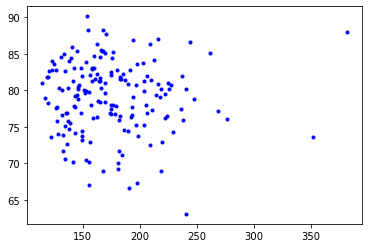

In [35]:
dfp100 = df.query('power > 100').copy()
dfp100.index = range(len(dfp100))
dfp100['ix_bin'] = dfp100.index // 15
dfp_avg = dfp100.groupby('ix_bin').mean()
plt.plot(dfp_avg.power, dfp_avg.cadence, 'b.')